# Bagging: Meta-Estimador

En machine learning, el concepto de meta-estimador también llamado bagging hace referencia a un tipo de modelo que consiste en un conjunto de modelos/instancias (ejemplo, varios modelo de regresión lineal simple, por mencionar un tipo), los cuales realizan la tarea de regresión o clasificación específica para la cual fueron entrenados, y sus salidas luego se promedian para obtener el resultado final esperado.

Lo que busca este modelo de bagging es robustecer el modelo que queramos construir al brindar varias instancias que nos arrojan los resultados y a partir de ellos obtener el resultado final. De alguna manera, se sustenta en el hecho de que trabaja con varios modelos al mismo tiempo y allí es donde radicaría su fortaleza.

He aquí una explicación más amplia brindada por `ChatGPT`:

Cuando hablamos de **bagging** en el contexto de un **meta-estimador** en *machine learning*, nos referimos a cómo la técnica de **Bootstrap Aggregating** (bagging) se implementa como un *estimador* que combina múltiples instancias de un modelo base para crear un modelo final. En este sentido, el **meta-estimador** es responsable de aplicar la técnica de bagging a un estimador base (un modelo de aprendizaje).

## ¿Qué es un Meta-Estimador?

Un *meta-estimador* es un objeto en *machine learning* que toma como entrada uno o más estimadores base (es decir, modelos simples), y su tarea es combinar esos modelos para mejorar el rendimiento general del sistema. El meta-estimador no construye modelos de forma independiente, sino que coordina cómo se agrupan las predicciones de múltiples instancias de un modelo base.

En el caso del bagging, el meta-estimador se encarga de:

1. **Muestrear los datos de entrenamiento con reemplazo** (bootstrap) para crear múltiples subconjuntos.
2. **Entrenar un estimador base** (por ejemplo, un árbol de decisión, regresión lineal, etc.) sobre cada uno de estos subconjuntos.
3. **Combinar las predicciones** de todos los modelos base entrenados, por ejemplo, promediando las salidas (en el caso de regresión) o haciendo una votación mayoritaria (en el caso de clasificación).

## ¿Cómo se Implementa el Bagging como un Meta-Estimador?

El **bagging** en el contexto de un meta-estimador se aplica generalmente sobre un conjunto de modelos base, y un ejemplo típico es el uso del **BaggingClassifier** o **BaggingRegressor** en bibliotecas como **scikit-learn**.


## ¿Cómo Funciona Aquí el Meta-Estimador?

1. **`BaggingClassifier`** es un *meta-estimador* que toma el **`base_estimator`** (en este caso, un árbol de decisión) y lo entrena sobre diferentes subconjuntos de datos.
2. El conjunto de entrenamiento se divide en **subconjuntos aleatorios** mediante muestreo con reemplazo.
3. El **meta-estimador** entrena un árbol de decisión en cada uno de esos subconjuntos.
4. Finalmente, el **meta-estimador** combina las predicciones de los 50 árboles entrenados mediante una votación mayoritaria (en clasificación).

## Características del Bagging como Meta-Estimador

- **Múltiples Modelos**: El meta-estimador crea y combina predicciones de varios modelos base.
- **Independencia**: Los modelos base se entrenan de forma independiente sobre diferentes subconjuntos de datos.
- **Combinación de Predicciones**: Las predicciones de los modelos base se combinan (promediado en regresión o votación en clasificación).
- **Mejora del Rendimiento**: Ayuda a reducir la varianza del modelo final, especialmente cuando se utilizan estimadores inestables como los árboles de decisión.

## Ventajas de Utilizar un Bagging Meta-Estimador

- **Reducción de la Varianza**: Al combinar múltiples modelos entrenados en subconjuntos diferentes, se reducen las fluctuaciones y la varianza en las predicciones.
- **Estabilidad**: Los modelos base pueden ser inestables o sensibles a pequeñas variaciones en los datos (por ejemplo, árboles de decisión), y el bagging ayuda a hacerlos más estables.
- **Generalización**: Bagging ayuda a evitar el sobreajuste (overfitting) cuando se utilizan modelos que pueden ser demasiado complejos o propensos a adaptarse demasiado al conjunto de entrenamiento.

## Conclusión

En resumen, cuando hablamos de **bagging como meta-estimador**, nos referimos a cómo se organiza la técnica de *Bootstrap Aggregating* para entrenar múltiples instancias de un modelo base, y luego combinar sus predicciones para mejorar el rendimiento general del modelo. Esta técnica es especialmente útil cuando se tiene un modelo base que es propenso al sobreajuste o que tiene alta varianza.

## Ejemplo en Python

### Clasificación y Regresión

#### Datos salariales

In [1]:
import pandas as pd

In [2]:
personas = pd.read_csv("../datos/salarios.csv")
personas.head()

,edad,estudio,horas,clase_salario,valor_salario
0,27,9,40,0,12967.33
1,30,9,40,0,20171.40
2,42,9,40,1,39051.04
3,68,9,25,1,33567.25
4,34,8,40,0,8247.42


In [3]:
personas.shape

(100, 5)

#### $N$ muestreos para $M$ modelos

Cada instancia o subconjunto modelo a utilizar debe entrenarse con una parte aleatoria de los datos. Lo mismo se puede realizar con respecto a las características (algunos modelos se pueden entrenar con ciertas características, y otros con otras).

In [4]:
for i in range(5):
    print(personas.sample(frac=1/10), "\n")

    edad  estudio  horas  clase_salario  valor_salario
41    27        7     40              1       27872.31
2     42        9     40              1       39051.04
23    70        5     40              1       35076.38
34    54        9     40              0       23152.40
89    53        9     40              1       42280.46
48    19        9     35              0       12215.87
38    47        9     40              0       17935.66
43    49       10     44              0       19431.12
97    46        3     40              0       17190.41
30    20        9     40              0        2285.43 

    edad  estudio  horas  clase_salario  valor_salario
43    49       10     44              0       19431.12
96    20       10     25              0        2266.79
50    20       10     40              0        2285.43
88    24        3     60              0        2310.27
56    34       13     39              0       12717.67
70    21       10     50              1       27139.48
42    24

#### Escalamiento de los datos

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
personas = MinMaxScaler().fit_transform(personas)
personas

array([[0.15873016, 0.53333333, 0.54929577, 0.        , 0.2510676 ],
       [0.20634921, 0.53333333, 0.54929577, 0.        , 0.39675954],
       [0.3968254 , 0.53333333, 0.54929577, 1.        , 0.77857306],
       [0.80952381, 0.53333333, 0.33802817, 1.        , 0.66767131],
       [0.26984127, 0.46666667, 0.54929577, 0.        , 0.15561422],
       [0.14285714, 0.8       , 0.69014085, 0.        , 0.12572228],
       [0.0952381 , 0.2       , 0.33802817, 0.        , 0.03466478],
       [0.04761905, 0.6       , 0.54929577, 0.        , 0.33647331],
       [0.06349206, 0.6       , 0.1971831 , 0.        , 0.03441342],
       [0.38095238, 0.6       , 0.54929577, 0.        , 0.26111527],
       [0.50793651, 0.13333333, 0.26760563, 0.        , 0.38118558],
       [0.22222222, 0.6       , 0.54929577, 0.        , 0.1103994 ],
       [0.77777778, 0.66666667, 0.4084507 , 1.        , 0.66779689],
       [0.65079365, 0.53333333, 0.54929577, 1.        , 0.5173322 ],
       [0.26984127, 0.8       , 0.

#### Visualización de los datos

##### Estudio, Horas, Edad -> Salario

In [8]:
import matplotlib.pyplot as plt

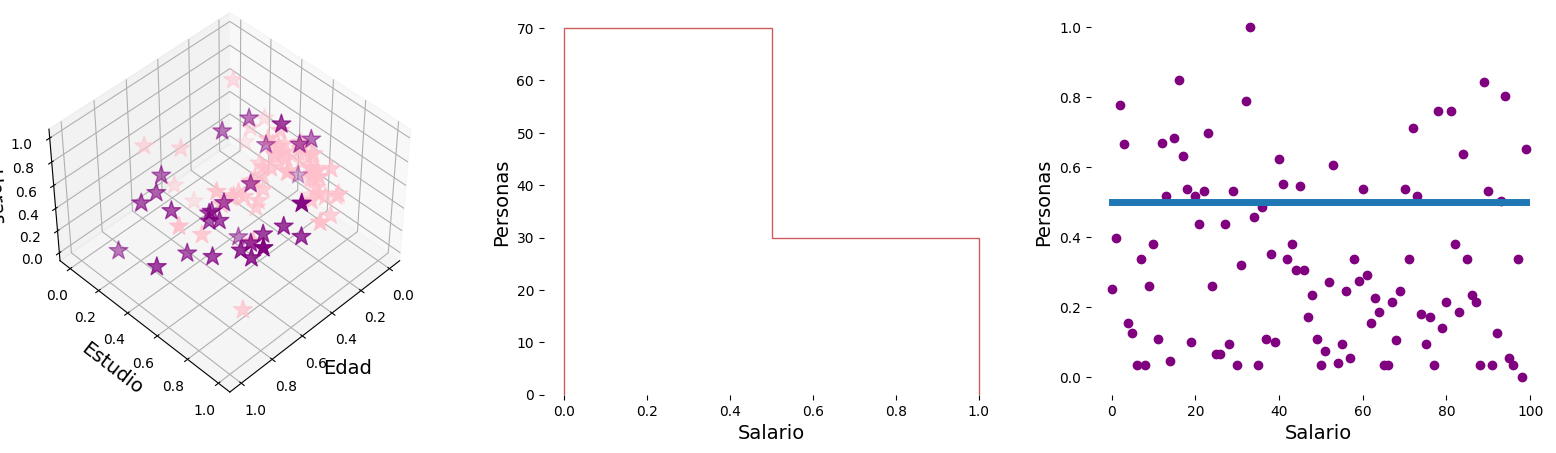

In [13]:
fig = plt.figure(figsize=(20, 5))

# Grafica de dispersion: Edad, Estudio, Horas
ax = fig.add_subplot(1, 3, 1, projection="3d")
colores = ("pink", "purple")

for clase in (0,1):
    ax.scatter(
        personas.T[0][personas.T[3]==clase],
        personas.T[1][personas.T[3]==clase],
        personas.T[2][personas.T[3]==clase],
        marker="*", c=colores[clase], s=200
    )
ax.set_xlabel("Edad", size=14)
ax.set_ylabel("Estudio", size=14)
ax.set_zlabel("Horas", size=14)
ax.view_init(45, 45)

# Histograma -> clase salarial
ax = fig.add_subplot(1, 3, 2)
ax.hist(personas.T[3], bins=2, histtype="step", color="indianred")
ax.set_xlabel("Salario", size=14)
ax.set_ylabel("Personas", size=14)
plt.setp(ax.spines.values(), linewidth=0)

# Visualizacion del salario de las personas
ax = fig.add_subplot(1, 3, 3)
ax.plot(personas.T[4], marker="o", color="purple", linewidth=0)
ax.plot([0.5]*100, linewidth=5)
ax.set_xlabel("Salario", size=14)
ax.set_ylabel("Personas", size=14)
plt.setp(ax.spines.values(), linewidth=0)

plt.show()

#### Creación de Meta-modelos Bagging

##### Estimador base elegido: K-vecinos más cercanos (KNN)

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [29]:
# Separando las caracteristicas de las variables objetivo
datos = personas.T[:-2].T # features
clase = personas.T[3] # clase de salario (alto o bajo)
valor = personas.T[4] # valor de salario

# Clasificador base y regresor base
clasificador = KNeighborsClassifier(n_neighbors=3)
regresor = KNeighborsRegressor(n_neighbors=3)

n = 50 # numero de modelos: 1 vs 50

# Modelos bagging para clasificacion y regresion con 30% de muestra
meta_clasificador = BaggingClassifier(
    estimator=clasificador,
    n_estimators=n,
    max_samples=0.30
).fit(datos, clase)

meta_regresor = BaggingRegressor(
    estimator=regresor,
    n_estimators=n,
    max_samples=0.30
).fit(datos, valor)

# Metricas relevantes para clasificacion y regresion
print("Accuracy:", 
     accuracy_score(clase, meta_clasificador.predict(datos)))
print("R2 score (coeficiente de determinación):",
     r2_score(valor, meta_regresor.predict(datos)))

Accuracy: 0.85
R2 score (coeficiente de determinación): 0.31929805520235477


### Acotación extra...

Es importante tener en cuenta que la técnica de meta-estimadores permite utilizar tanto un solo tipo de modelo base como múltiples tipos. En el caso anterior vimos un ejemplo en el que se usa un solo tipo de modelo base.

Si quisiéramos emplear distintos tipos, haríamos algo como esto (ejemplo tomado de `ChatGPT`):

Un caso típico en el que se usan **distintos tipos de modelos base** dentro de un **meta-estimador** es el método de **Stacking** (*apilamiento*).

#### Stacking (Apilamiento)

En el **stacking**, el objetivo es combinar varios modelos base que pueden ser **de diferentes tipos** para mejorar el rendimiento general. Luego, se utiliza otro modelo (conocido como el **meta-modelo** o **modelo de segundo nivel**) para combinar las predicciones de estos modelos base.

#### ¿Cómo funciona el Stacking?

1. **Entrenamiento de modelos base**:
   - Se entrenan varios modelos base utilizando el conjunto de entrenamiento original. Estos modelos pueden ser de **tipos diferentes**, como:
     - **Árboles de decisión**
     - **Máquinas de soporte vectorial (SVM)**
     - **Redes neuronales**
     - **Modelos de regresión lineal**
     - **k-Vecinos más cercanos (KNN)**

2. **Generación de predicciones**:
   - Cada modelo base realiza predicciones sobre el conjunto de datos de entrenamiento y genera una "predicción base".

3. **Entrenamiento del meta-modelo**:
   - Las predicciones generadas por los modelos base se usan como características de entrada para entrenar el **meta-modelo** (o modelo de segundo nivel). Este modelo puede ser cualquier tipo de modelo, pero generalmente se utiliza un modelo simple como **regresión logística**, **regresión lineal** o **SVM** para combinar las salidas de los modelos base.

4. **Predicción final**:
   - El **meta-modelo** realiza la predicción final basándose en las predicciones de los modelos base. La salida final del meta-modelo es la predicción del conjunto de stacking.

#### Ventajas del Stacking con Modelos de Distintos Tipos:

- **Diversidad**: Cada modelo base aporta una perspectiva diferente sobre los datos, aprovechando diferentes algoritmos y representaciones.
- **Mejor generalización**: La combinación de modelos base de diferentes tipos puede mejorar la capacidad de generalización del modelo final al combinar sus fortalezas y mitigar sus debilidades.
- **Reducción de sesgo**: Dado que los modelos base pueden tener diferentes supuestos y formas de aprender, el stacking puede reducir el sesgo general del modelo.

In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los modelos base (de diferentes tipos)
base_learners = [
    ('dt', DecisionTreeClassifier()),   # Árbol de decisión
    ('svm', SVC(probability=True)),     # SVM
    ('knn', KNeighborsClassifier())     # k-Vecinos más cercanos
]

# Meta-modelo (por lo general, un modelo simple)
meta_model = LogisticRegression()

# Crear el clasificador Stacking
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Entrenar el modelo
stacking_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = stacking_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo de stacking: {accuracy:.4f}")

Precisión del modelo de stacking: 1.0000
